In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victoriaaalexander","key":"d4a52b6f8cf9d341dfd719a23273d0ed"}'}

In [2]:
import os
import zipfile

# Move kaggle.json to the right location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
# Download the dataset
!kaggle datasets download -d clmentbisaillon/fake-and-real-news-dataset

# Unzip the dataset
with zipfile.ZipFile("fake-and-real-news-dataset.zip","r") as zip_ref:
    zip_ref.extractall()


Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
  0% 0.00/41.0M [00:00<?, ?B/s]
100% 41.0M/41.0M [00:00<00:00, 839MB/s]


In [4]:
import pandas as pd

# Load the data
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Preview
fake_df.head(), real_df.head()


(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [5]:
fake_df['label'] = 0  # Fake = 0
real_df['label'] = 1  # Real = 1


In [6]:
data = pd.concat([fake_df, real_df], axis=0)
data = data.sample(frac=1).reset_index(drop=True)


In [7]:
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

data['text'] = data['text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.7)
X = vectorizer.fit_transform(data['text'])
y = data['label']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9876391982182628
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4731
           1       0.98      0.99      0.99      4249

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



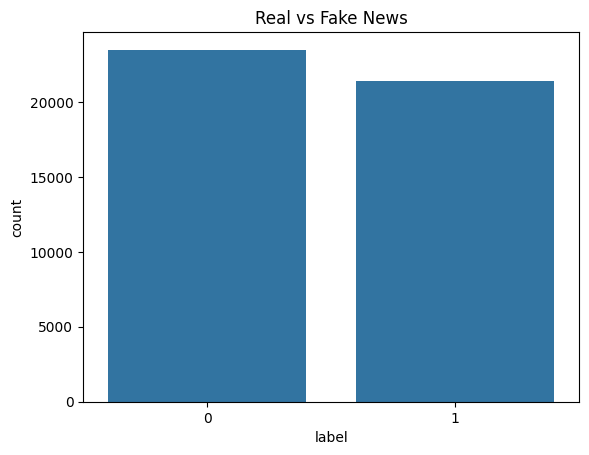

Top 10 words in Fake News: [('Trump', 64844), ('I', 42453), ('The', 40127), ('would', 23024), ('people', 21266), ('said', 21112), ('one', 19037), ('Donald', 16751), ('like', 16314), ('It', 16071)]
Top 10 words in Real News: [('said', 72025), ('The', 55109), ('U.S.', 38271), ('Trump', 36461), ('would', 31330), ('-', 31059), ('said.', 21582), ('(Reuters)', 21239), ('President', 17112), ('also', 15703)]


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class balance
sns.countplot(x='label', data=data)
plt.title("Real vs Fake News")
plt.show()

# Most common fake news words
from collections import Counter

fake_words = ' '.join(fake_df['text']).split()
real_words = ' '.join(real_df['text']).split()

# Most frequent words (excluding stopwords)
fake_freq = Counter([w for w in fake_words if w not in stop_words])
real_freq = Counter([w for w in real_words if w not in stop_words])

print("Top 10 words in Fake News:", fake_freq.most_common(10))
print("Top 10 words in Real News:", real_freq.most_common(10))


In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier()
}

for name, clf in models.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



Logistic Regression
Accuracy: 0.9876391982182628
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4731
           1       0.98      0.99      0.99      4249

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Naive Bayes
Accuracy: 0.9507795100222717
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      4731
           1       0.93      0.97      0.95      4249

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980


Linear SVM
Accuracy: 0.9974387527839643
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4731
           1       1.00      1.00      1.00      4249

    accuracy                           1.00      

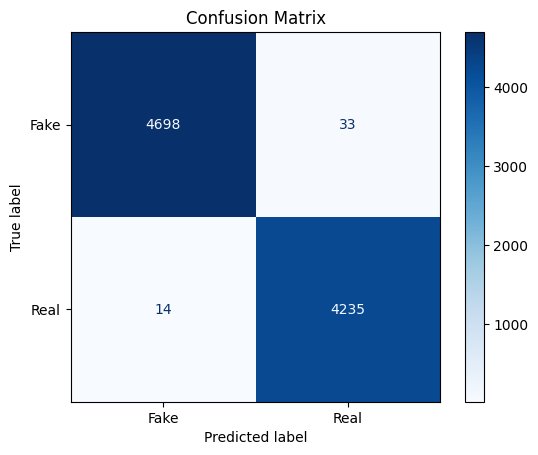

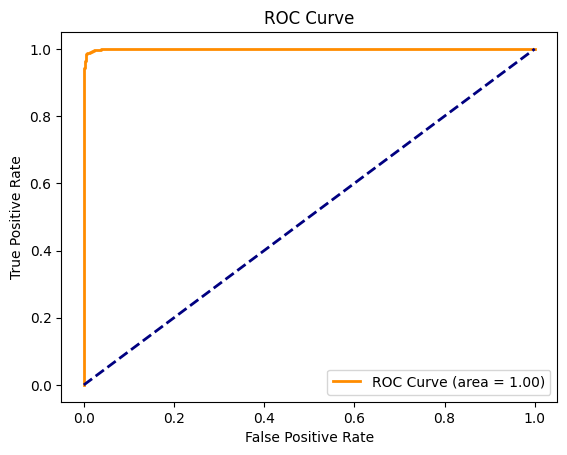

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake", "Real"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_probs = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


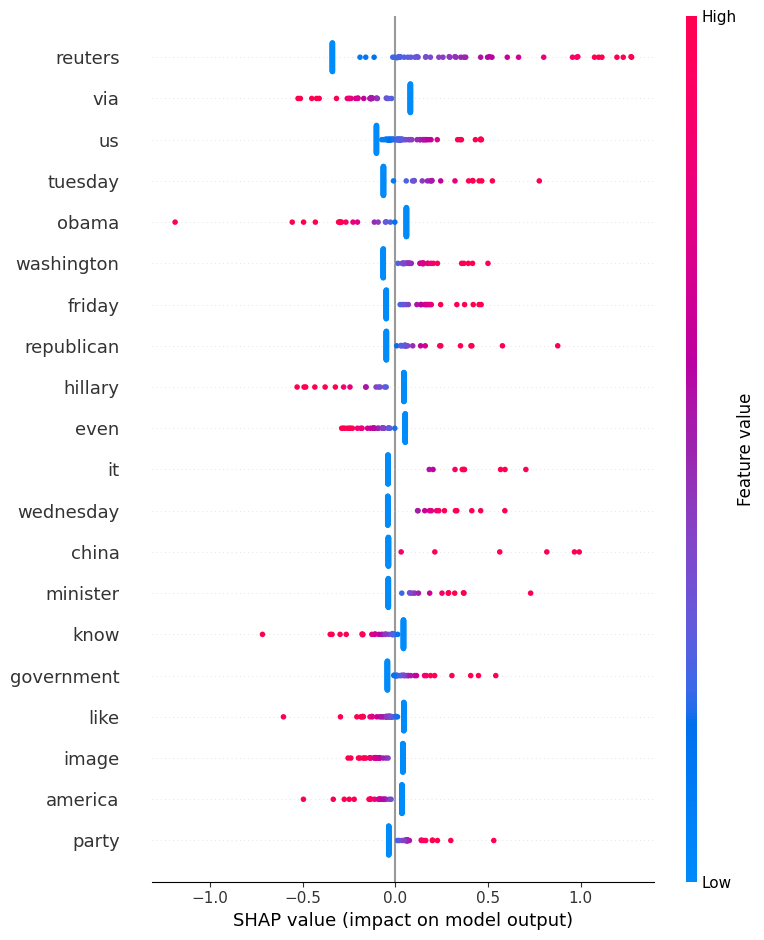

In [14]:
!pip install shap
import shap

# Sample data
sample = X_train[:100].toarray()

# SHAP for Logistic Regression
explainer = shap.Explainer(model, sample)
shap_values = explainer(sample)

shap.summary_plot(shap_values, features=sample, feature_names=vectorizer.get_feature_names_out())
